# Proteomics Genes GO Enrichment Analysis

Gene ontology enrichment analysis was performed using the web application in the [*Broad Institute's Molecular Signature Database (MSigDB)*](http://software.broadinstitute.org/gsea/login.jsp;jsessionid=D4E7C89F9FAD3D013DA7360584637226) website. The data that were used are the proteomics data sets listed [here](https://github.com/hariesramdhani/winter-internship-2017/blob/master/data/protPDE.csv). This analysis was done in four steps; analysis of the first top 20 proteomics genes, then 50, then 100 and finally all of the genes with **qvalue < 0.05** (total of 283 genes).

The results of these analyses then are processed using Python `pandas`, `seaborn` and `matplotlib` library for the visualization of the heatmap. `math` library was used to calculate some mathematical operation, `re` for the works requiring regular expression and `os` for the `listdir()` function. Using GSEA, Molecular Function (`MF`), Biological Process (`BP`) and Cellular Component (`CC`) analyses were done.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import re

os.chdir('data/GO_prot')

In [2]:
# Create dictionary for molecular function (MF), biological process (bp) and cellular component(cc) data
protMFdict = {}
protBPdict = {}
protCCdict = {}

# Initialize variables with the most appearance in the code
pValue = 'pValue'
geneSet = 'GeneSet'

# Read data from the files and classify them into MF, BP and CC each
for filename in os.listdir():
    if filename.startswith('MF'):
        keyName = re.findall(r'MFTop(\S*).txt', filename)[0]
        protMFdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    elif filename.startswith('BP'):
        keyName = re.findall(r'BPTop(\S*).txt', filename)[0]
        protBPdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    elif filename.startswith('CC'):
        keyName = re.findall(r'CCTop(\S*).txt', filename)[0]
        protCCdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]

colNames = list(protMFdict.keys())
finColNames = ['GeneSet', '25', '50', '100', 'All']

In [3]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
protBPs = colNames
protBPDF = protBPdict[protBPs[0]]
for protBP in protBPs[1:]:
    protBPDF = pd.merge(protBPDF, protBPdict[protBP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
protBPDF['# NaN'] = protBPDF.isnull().sum(axis=1)
protBPDF = protBPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protBPDF['GeneSet']]
protBPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    protBPDF[colName] = [-(math.log(pvals, 10)) for pvals in protBPDF[colName]]

protBPDF = protBPDF[finColNames]
protBPDF

,GeneSet,25,50,100,All
0,small molecule metabolic process,6.677781,12.761954,22.552842,46.869666
1,establishment of localization in cell,6.872895,8.718967,NaN,24.815309
2,phosphate containing compound metabolic process,NaN,6.876148,14.943095,33.856985
3,organonitrogen compound metabolic process,NaN,9.353596,15.014574,47.365523
4,glycosyl compound metabolic process,NaN,6.829738,15.821023,38.274088
5,protein complex subunit organization,6.021363,7.184422,NaN,24.198596
6,mitochondrial electron transport nadh to ubiqu...,NaN,6.869666,17.681937,30.793174
7,organophosphate metabolic process,NaN,7.467246,17.787812,39.028724
8,purine containing compound metabolic process,NaN,9.376751,18.163676,39.772113
9,nucleobase containing small molecule metabolic...,NaN,10.924453,18.477556,42.987163


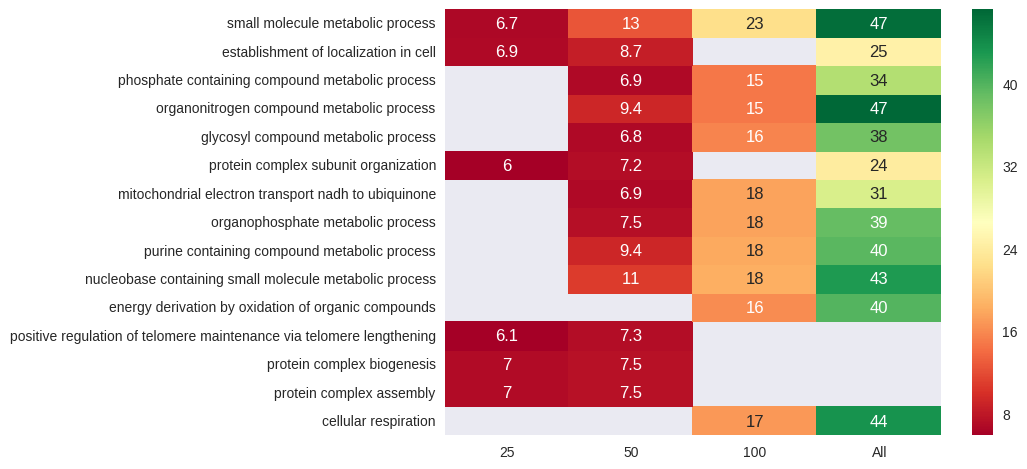

In [4]:
# Generate the heatmap of GSEA Biological Process
sns.heatmap(protBPDF.ix[:, 1:], cmap="RdYlGn", annot=True, yticklabels=list(protBPDF['GeneSet']))

The heatmap was ranked by the number of NaNs that exist in the each gene set. As can be seen from the heatmap above, we can learn that the biological process that always appears and has the highest p-value (-log<sub>10</sub>) in the gene set is <span style='color:green'>small molecule metabolic process</span> which is a collection of **the chemical reactions and pathways involving small molecules, any low molecular weight, monomeric, non-encoded molecule.** The second biological process that comes as close as the small molecule metabolic process is <span style='color:blue'>organonitrogen compund metabolic process</span>.

In [5]:
# Merge the Top25, Top50, Top100 and TopAll Cellular Component data
protCCs = colNames
protCCDF = protCCdict[protCCs[0]]
for protCC in protCCs[1:]:
    protCCDF = pd.merge(protCCDF, protCCdict[protCC], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row    
protCCDF['# NaN'] = protCCDF.isnull().sum(axis=1)
protCCDF = protCCDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protCCDF['GeneSet']]
protCCDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    protCCDF[colName] = [-(math.log(pvals, 10)) for pvals in protCCDF[colName]]

protCCDF = protCCDF[finColNames]
protCCDF

,GeneSet,25,50,100,All
0,mitochondrion,9.507240,13.341035,20.258061,53.787812
1,neuron projection,6.285670,6.139063,11.655608,25.066007
2,mitochondrial matrix,7.114639,6.498941,9.924453,21.368556
3,cell body,5.203426,7.215383,13.832683,20.266001
4,cell projection,6.638272,7.388277,13.168770,25.950782
5,neuron part,7.917215,8.080399,15.503070,28.991400
6,mitochondrial part,7.580044,9.458421,19.469800,54.913640
7,oxidoreductase complex,NaN,7.221849,13.982967,33.576754
8,cell junction,6.950782,6.413413,NaN,21.619789
9,nadh dehydrogenase complex,NaN,6.869666,15.497573,28.651695


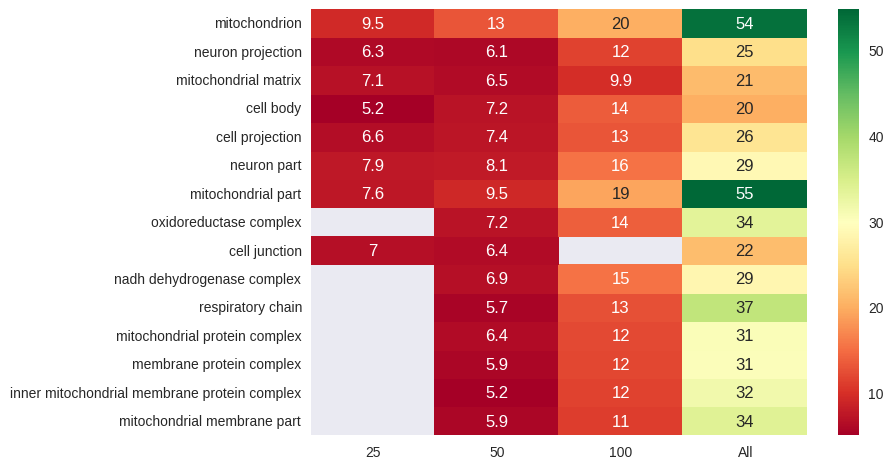

In [6]:
# Generate the heatmap of GSEA Cellular Component
sns.heatmap(protCCDF.ix[:, 1:], cmap="RdYlGn", annot=True, yticklabels=list(protCCDF['GeneSet']))

In [7]:
# Count the number of the GO cellular component gene sets that contain mitochondria
print('In the Top 15 of GSEAhere are %d GO cellular components with mitochondria on the name'% 
      len(protCCDF[protCCDF['GeneSet'].str.contains('mito')]))

In the Top 15 of GSEAhere are 6 GO cellular components with mitochondria on the name


The heatmap above tells us that most of the genes that are upregulated and downregulated in MS3 proteomics study are mostyly found in the mitochondria, this is prove by the fact that the first three GO cellular component results are <span style='color:purple'>mitochondrial part</span>, <span style='color:purple'>mitochondrion</span> and <span style='color:purple'>respiratory chain</span>. The heatmap also tells us that out of the top 15 of the GSEA results, nine of them are related to <span style='color:red'>cell respiratory system</span> with six of the gene sets have the word mitochondria in the name and five of them are related to <span style='color:blue'>neuron and nervous system.</span>

In [8]:
# Merge the Top25, Top50, Top100 and TopAll Molecular Function data
protMFs = colNames
protMFDF = protMFdict[protMFs[0]]
for protMF in protMFs[1:]:
    protMFDF = pd.merge(protMFDF, protMFdict[protMF], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row    
protMFDF['# NaN'] = protMFDF.isnull().sum(axis=1)
protMFDF = protMFDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protMFDF['GeneSet']]
protMFDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    protMFDF[colName] = [-(math.log(pvals, 10)) for pvals in protMFDF[colName]]

protMFDF = protMFDF[finColNames]
protMFDF

,GeneSet,25,50,100,All
0,nadh dehydrogenase activity,3.705534,7.050610,15.931814,25.361511
1,oxidoreductase activity acting on nad p h quin...,3.431798,6.490797,14.590067,22.725842
2,ribonucleotide binding,3.400117,5.394695,10.147520,19.554396
3,enzyme binding,3.559091,4.021363,9.856985,19.309804
4,oxidoreductase activity acting on nad p h,NaN,5.472370,12.203426,21.457175
5,oxidoreductase activity,NaN,5.982967,10.276544,24.527244
6,syntaxin binding,4.747147,5.472370,7.224754,NaN
7,transmembrane transporter activity,NaN,4.008331,6.565431,15.226214
8,snare binding,4.333482,4.920819,6.399027,NaN
9,transporter activity,NaN,4.181115,6.141463,17.440093


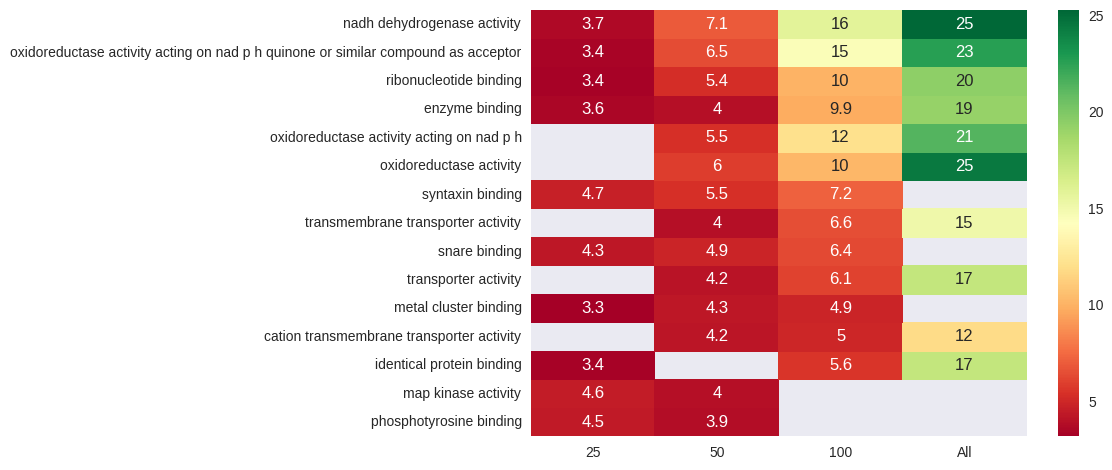

In [9]:
# Generate the heatmap of GSEA Molecular Function
sns.heatmap(protMFDF.ix[:, 1:], cmap="RdYlGn", annot=True, yticklabels=list(protMFDF['GeneSet']))

In [10]:
print('Number of Gene sets with \'transporter\' on it\'s name:' , 
      len(protMFDF[protMFDF['GeneSet'].str.contains('transporter')]))

Number of Gene sets with 'transporter' on it's name: 3


For the last part, the Gene Ontology Molecular Function analysis was also performed, from the result it also can be learned that most of the Gene Ontology Molecular Function gene sets in the top 15 are also related with mitochondria and respiration activity.